In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df = df.dropna().copy()
print("Shape after cleaning:", df.shape)

Shape after cleaning: (200, 5)


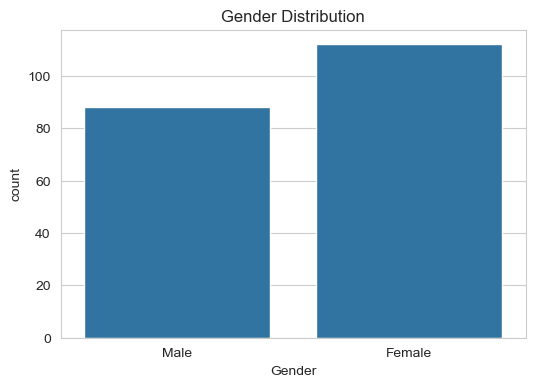

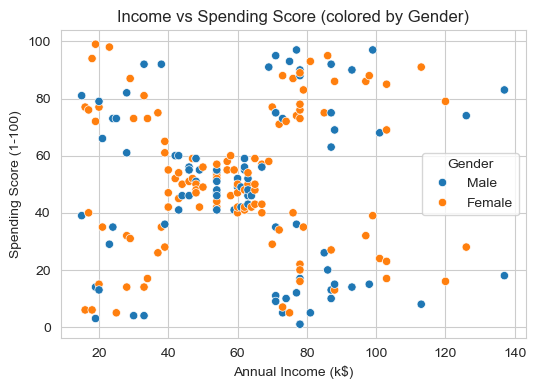

In [5]:
# gender distribution and spending habits
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Income vs Spending Score (colored by Gender)")
plt.show()


In [6]:
# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

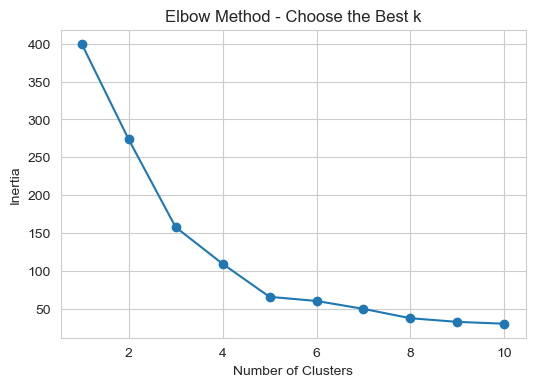

In [7]:
# Find best number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method - Choose the Best k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels

C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


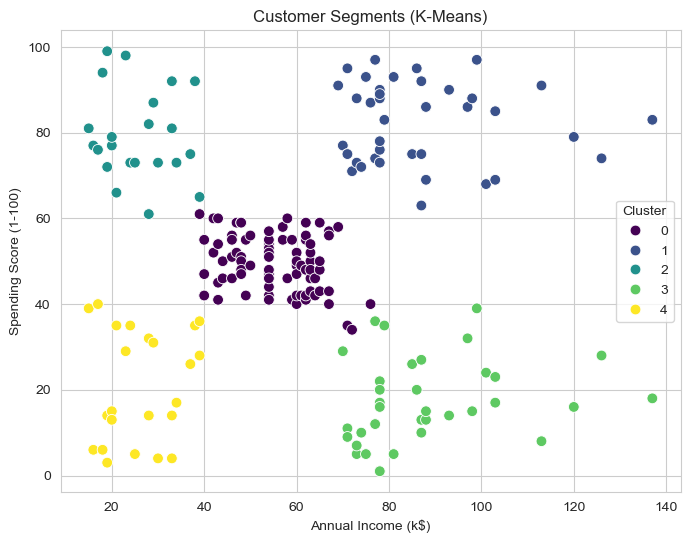

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster", palette="viridis", data=df, s=60
)
plt.title("Customer Segments (K-Means)")
plt.show()

In [10]:
# Cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(centers, columns=["Annual Income (k$)", "Spending Score (1-100)"]))


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [11]:
# Average stats per cluster
cluster_avg = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nAverage Income and Spending per Cluster:")
print(cluster_avg)



Average Income and Spending per Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043



--- Trying DBSCAN ---


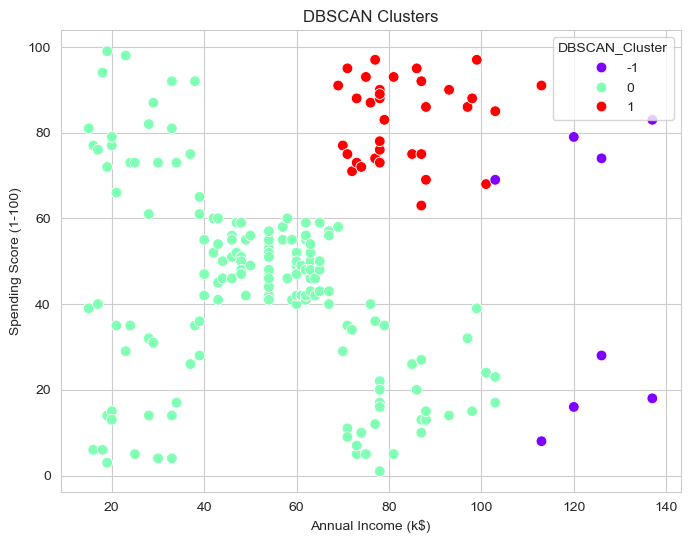

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


In [12]:
# DBSCAN
print("\n--- Trying DBSCAN ---")
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = db_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="DBSCAN_Cluster", palette="rainbow", data=df, s=60
)
plt.title("DBSCAN Clusters")
plt.show()

print(df["DBSCAN_Cluster"].value_counts())
